In [1]:
import pandas

from matplotlib import pyplot
import numpy as np
from scipy.optimize import curve_fit
from scipy.integrate import quad
import plotly.offline as py
import plotly.graph_objs as go



# Lecture 6: Quantum Measurement Backaction

!!! summary "Learning goals"

    After this lecture you will be able to:

    - Do cool things
    

In this lecture, we will explore the concept of "quantum backaction", the idea in QM that measurement always induces some "action" on the state you are measuring.  

This is also something that occurs in classical mechanics: if we measure the position of something with a camera, we need to use the flash to bounce some light off of it.  Even classically, the electromagnetic waves from the flash will impart some momentum impulse on the thing we are taking a picture of, "kicking" it by a very small amount.  In principle, in classical mechanics, this impulse from the flash can be known with infinite accuracy, and we can compensate for it and determine the position of our object with theoretically infinite precision.  We could also determine its momentum at the same time by measuring the Doppler shift of the light from our flash.  

The key difference in QM in this example is that the electromagnetic field from our flash necessarily contains quantum uncertainty, which will both limit how accurately we can measure the position (known as "quantum imprecision noise") and also give rise to quantum uncertainty in the force the light exerts on the object when it bounces (what we will call "quantum backaction noise").

While it would seem at first that these two are unrelated, in QM they are *fundamentally* connected: there is a minimum allowable disturbance of the object determined by how much information we acquire about it.

Furthermore, the nature of the backaction of your measurement itself, and the way it affects the noise you observe in subsequent measurements, depends on exactly *what* you measure.  

In this lecture, we will try to illustrate some simple examples of these concepts without any mathematical formalism, which will be deferred to the next two lectures.

Before we start, we should review the generalized statistical interpretation of QM.  If we want to predict what happens when we make a measurement:

1. Find the eigenstates and eigenvalues $|\lambda_A\rangle$, $\lambda_A$ of some observable $\hat{A}$

2. The measurement outcome is one such $\lambda_A$

3. The measurement outcomes are stochastic and the probability of finding value $\lambda_A$ is given by $|\langle \lambda_A | \psi \rangle|^2$, where $\hat{A}|\lambda_A\rangle = \lambda_A|\lambda_A\rangle$

4. After measurement with outcome $\lambda_A$, the state collapses to $|\lambda_A\rangle$ and subsequently continues to evolve according to the time-dependent Schrodinger equation (TDSE)

What happens if we measure again?  In particular, if we measure continuously as a function of time, how does the state evolve?  If we just "look" at our quantum object, what happens?

What does continuous measurement even mean?  Surely we cannot just continuously and instantaneously collapse the wavefunction, or else we could prevent objects from moving just by looking at them.

So, if we are looking "all the time", how often does the wavefunction collapse?

1. The collapse occurs randomly in time

2. It happens at an average "collapse rate" determined by how quickly I obtain information about the thing I am observing

The greater the signal-to-noise ratio our detector provides, the faster the average collapse rate.  Note that this means that collapse is a Poissonian process!

**Caveat**: Point 2 above assumes that we are the only observers, and that none of the quantum information is leaking out to the environment, which is almost *never* the case.  In almost all experiments there is some loss of information about the quantum state into a "bath" that we don't have access to.  In this case, Point 2 should be amended to

2. (revised) Collapse events occur at a rate determined by the rate of leakage of information out of the quantum state of the object we are obersving (including both our measurement rate and that of all others in the environment)

Let's take a look at a toy example: the measurement of the position of a harmonic oscillator that starts in its ground state.  We will measure its position.

Upon measurement, its wavefunction collapses to a $\delta$-function!  What will happen to $\langle x(t) \rangle$ after the collapse occurs?

- Since a $\delta$-function is not a stationary state, it will "move", and $\langle x(t) \rangle$ will depend on time

- What is the energy after we have measured?  It should be higher than the ground state energy.

As a result of measurement, the mass will experience a random fluctuating force that increases with the strength of our measurement.

- This is called quantum backation force and the resulting noise in $\langle x(t) \rangle$ is called quantum backation noise, or sometimes collapse noise

**Caveat**: if we have complete information about the results of our measurements, this quantum backation noise is not random, and we can completely reconstruct it based on the measurement and thus predict how the mass will move!  However, if some information is lost (perhaps in amplifier noise, or due to somebody else measuring and hiding their results) then this quantum backation noise will appear completely random to us.

## The standard quantum limit (in optomechanics)

We have talked previously about laser interferometers and the sensitivity one would need to detect thermomechanical motion.

One of the striking features of QM is the prediction that even if we cool a vibrating object to absolute zero, it will still be "moving" due to zero-point fluctuations.  As we saw earlier, one easy way to remember how big are these fluctuations is to apply the equipartition theorem but replace $\frac{1}{2}kT$ with $\frac{1}{2}E_0 = \frac{1}{4}\hbar\omega$:

$$
\frac{1}{2}m\omega^2 x^2_{ZPF} = \frac{1}{4}\hbar\omega \rightarrow x_{ZPF} = \sqrt{\frac{\hbar}{2m\omega}}
$$

Now, as experimentalists, we might ask whether we can build something to measure this.

To answer this properly, we need to figure out the power spectral density of these fluctuations.  Just like in the classical case

$$
S_{xx}^{ZPF} = \frac{x_{ZPF}^2}{\pi\gamma} = \frac{x_{ZPF}^2}{\pi\omega_0}Q 
$$

Just like in the classical case, the higher the Q-factor, the easier it is to measure quantum fluctuations.

To detect these quantum fluctuations, it is common to use a laser interferometer.  

![](figures/6/laser_int.PNG){style="width:500px;align:center"}

As we know, we can always increase the position sensitivity of a laser interferometer by turning up the laser power (in principle, though, in real life the laser power can be limited by boring things like absorption heating and melting mirrors).  But ignoring these issues, we can theoretically just turn up the laser, decreasing the (squared) sensitivity of the laser detector because $S_{xx}^{det} \propto \frac{1}{P}$ until it is smaller than $S_{xx}^{ZPF}$ and then directly observe quantum fluctuations.

![](figures/6/noise_spectra.PNG){style="width:650px;text-align:center"}

It almost seems like a conspiracy: the laser shot noise and quantum backaction noise cross exactly where we might be able to observe the zero-point fluctuations!
Of course, it is not actually a coincidence; they cross there because that is exactly the point at which you begin to get sufficient information to collapse the wavefunction before the quantum motion "decays" (or, more precisely, before it "decoheres", determined by the autocorrelation function of our device $\propto \frac{1}{\gamma}$).

Finally, the two noise curves in the above plot look very different in the $S_{xx}^{meas}(\omega)$ spectrum.

![](figures/6/noise_spectra_2.PNG){style="width:500px;text-align:center"}

$S_{xx}^{det}$ is the white detector noise floor from the added noise in your laser detection system, while $S_{xx}^{ZPF}$ and the backaction noise are Lorentzian noise peaks associated with actual mechanical motion.

# Homework Lecture 6

## Exercise 1: Quantum collapse noise and Quantum Correlations

In this exercise, you will explore the influence of quantum collapse on the time evolution of an observable 

In this exercise, we will consider a spin-1/2 particle in a magnetic field oriented in the $z$ direction with magnitude $B_0$. 

At $t=0$, the spin is in the state 

$$
|\Psi(t=0)\rangle =
\frac{|\uparrow \rangle +  |\downarrow \rangle}{\sqrt{2}}
$$

**(a)** Find $\langle S_x(t) \rangle$ for $t>0$ assuming no measurements and no collapse of the wavefunction.

**(b)** At $t_1 = \frac{\pi}{\omega}$, where $\omega  = \omega_L $ is the Larmor frequency, you  measure $S_x$. What is the outcome of the measurement? Find $\langle S_x(t) \rangle$ for $t > t_1$. 

**(c)**  You then measure $S_x$ again at $t_2 = \frac{3\pi}{2\omega}$ and find the value $\hbar/2$. Find $\langle S_x(t) \rangle$ for $t > t_2$. 

**(d)** Make a plot of $\langle S_x(t) \rangle$  for $0 < t < 5 \pi/ \omega$. 

**(e)** What happens to the phase of our oscillations each time a quantum collapse occurs? 

**(f)** Now conceptually think about what happens to the phase if measurements are occurring continuously with a Poissionian distribution in time? 

**(g)** If I have no information about the measurement or their outcome, what will be behaviour of the phase of the oscillations I observe, on average? 

**(h)** If I do know the time of a collapse event (because I observe the measurement with 100% certainty), what is the probability of measuring $\hbar/2$ again exactly $\delta t = \pi / \omega$ after my first measurement?  

*(The answer to (g) is actually something called "quantum correlations" and can be used in quantum sensing to achieve noise levels below the <a href=https://en.wikipedia.org/wiki/Quantum_limit>standard quantum limit</a>.)*

Finally, note that although we started with the particle already in a superposition state, after the first collapse event, it would  not have made a difference if we had instead started in the ground state: measuring adds finite-frequency noise to $\langle S_x(t) \rangle$ which it would not have if you had not measured it. 

## Demonstration:  Quantum collapse noise (a "Quantum Trajectory")

In the code below, I simulate the effect of quantum collapse noise on the oscillations of $\langle S_x(t) \rangle$ of a spin-1/2 particle.  

To do this, I simulate the effect of the stochastic "resetting" of the phase from quantum collapse events. The phase becomes reset to either 0 or $\pi$ depending on if the outcome of the measurement is $+\hbar/2$ or $-\hbar/2$. 

Also, the probability distribution of the two measurements oscillate in time, and these are used to determine the statistical likelyhood of a given measurement outcome. 

### Simple case (no measurements)

We will first start with the simple case of no measurements. In this case, we have:

$$
\langle S_x(t) \rangle = \frac{\hbar}{2} \cos(\omega t)
$$

and 

As a function of time, the probability of measuring $S_x = \hbar / 2$ is given by:

$$
P_{|x+\rangle} = \cos^2(\omega t)
$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
plt.rcParams['figure.dpi'] = 100

Text(0, 0.5, 'P$_{|x+\\rangle}$')

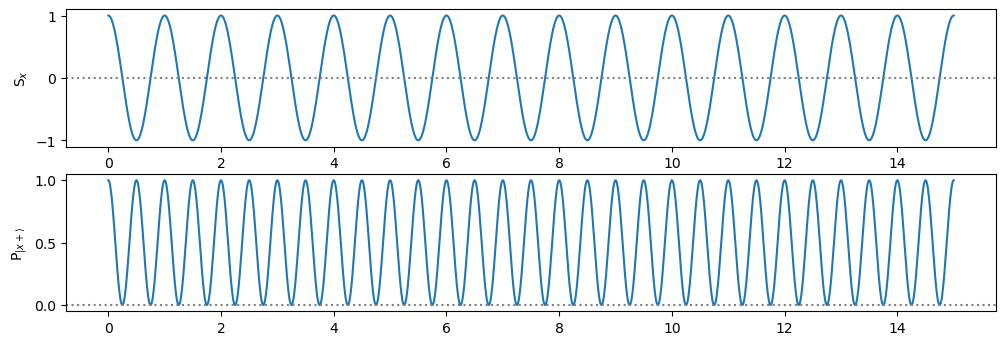

In [4]:
N_osc = 15
pts_per_osc = 100
t = np.linspace(0,N_osc,N_osc*pts_per_osc)
Sx = np.cos(2*np.pi*t)
P = np.cos(2*np.pi*t)**2

plt.subplots(figsize=(12,4))
plt.subplot(211)
plt.plot(t,Sx)
plt.axhline(0,ls=":", c="gray")
plt.ylabel("S$_x$")
plt.subplot(212)
plt.plot(t,P)
plt.axhline(0,ls=":", c="gray")
plt.ylabel(r"P$_{|x+\rangle}$")

### Now add collapse

To add random collapse to our code, we will need to generate collapse events at random times that follow a Poisson distribution, along with a random integer that tells us if our phase should be reset to 0 or $pi$. Note that  We can do this using `np.random.poisson()` and `np.random.uniform()`:

In [5]:
np.random.poisson(0.1,20)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [6]:
np.random.uniform(0,1,20)

array([0.54387684, 0.34740952, 0.47198597, 0.79069773, 0.92584075,
       0.92918226, 0.87342332, 0.32601303, 0.41705963, 0.79526622,
       0.3930268 , 0.74471249, 0.28376548, 0.87086132, 0.56325344,
       0.54070423, 0.9620744 , 0.85258665, 0.31566937, 0.74833569])

If the uniformly distributed number is less than $P_{|x+\rangle}$, then we collapse to $|x+\rangle$, and otherwise we collapse to $|x-\rangle$. 

If we collapse to $|x+\rangle$, we will reset the phase back to zero, and if not, we will reset the time to  $\pi$.

Here is the code:

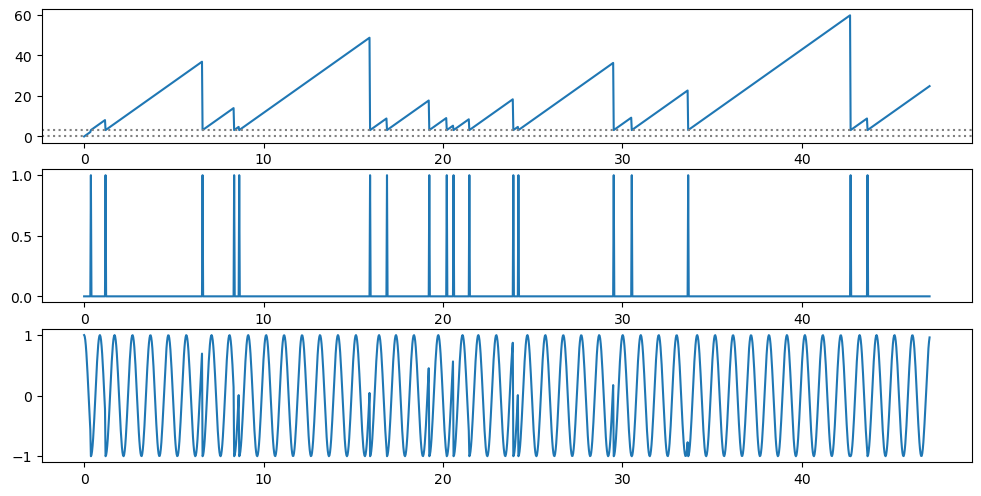

In [7]:
N_osc = 15
pts_per_osc = 100
N = N_osc*pts_per_osc

rate = 0.01 # average number of collapse events per time step
collapse_events = np.random.poisson(0.01,N)
collapse_results = np.random.uniform(0,1,N)

# Pre-allocate the array
t = np.linspace(0,N_osc*np.pi,N_osc*pts_per_osc)

phi = np.zeros(N)
dphi = 2*np.pi/pts_per_osc*np.pi

for i in range(1,N):
    if not collapse_events[i]:
        phi[i] = phi[i-1] + dphi
    else:
        if collapse_results[i] < np.sin(phi[i-i])**2:
            phi[i] = 0
        else:
            phi[i] = np.pi

P2 = np.cos(phi)**2
Sx2 = np.cos(phi)

lim=30 

plt.subplots(figsize=(12,6))
plt.subplot(311)
plt.plot(t,phi)
plt.axhline(0,ls=':', c='grey')
plt.axhline(np.pi,ls=':', c='grey')

plt.subplot(312)
plt.plot(t,collapse_events)

plt.subplot(313)
plt.plot(t,Sx2)


Also fun: what if we start in the ground state?

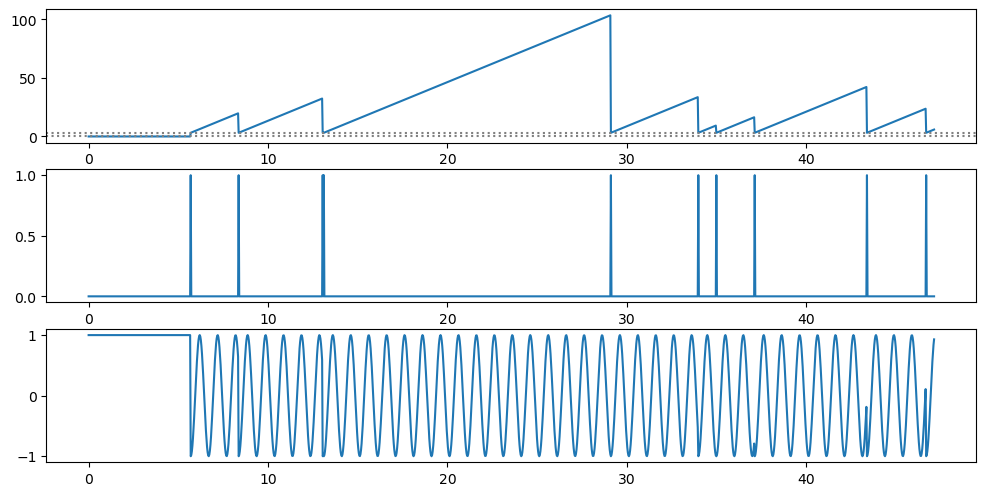

In [8]:
N_osc = 15
pts_per_osc = 100
N = N_osc*pts_per_osc

rate = 0.01 # average number of collapse events per time step
collapse_events = np.random.poisson(0.01,N)
collapse_results = np.random.uniform(0,1,N)

# Pre-allocate the array
t = np.linspace(0,N_osc*np.pi,N_osc*pts_per_osc)

phi = np.zeros(N)
dphi = 2*np.pi/pts_per_osc*np.pi

collapsed_once = False

for i in range(1,N):
    if not collapse_events[i]:
        if collapsed_once: 
            phi[i] = phi[i-1] + dphi
    else:
        if collapse_results[i] < np.sin(phi[i-i])**2:
            phi[i] = 0
        else:
            phi[i] = np.pi
        collapsed_once = True

P2 = np.cos(phi)**2
Sx2 = np.cos(phi)

lim=30 

plt.subplots(figsize=(12,6))
plt.subplot(311)
plt.plot(t,phi)
plt.axhline(0,ls=':', c='grey')
plt.axhline(np.pi,ls=':', c='grey')

plt.subplot(312)
plt.plot(t,collapse_events)

plt.subplot(313)
plt.plot(t,Sx2)


After the first collapse, we start oscillating!
